In [42]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn.model_selection


# evalue measures
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

print('Completed.')

Completed.


In [43]:
df = pd.read_csv('RealEstate.csv')

In [44]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [46]:
df.rename(columns = {'X1 transaction date':'transaction_date', 'X2 house age':'house_age',
                      'X3 distance to the nearest MRT station':'distance_to_nearest_MRT_station',
                        'X4 number of convenience stores':'number_of_convenience_stores', 'X5 latitude':'latitude',
                          'X6 longitude':'longitude', 'Y house price of unit area':'price_unit_area'}, inplace = True)

In [47]:
df.drop(columns=['latitude', 'longitude'], axis = 1, inplace = True)

In [48]:
# Exemplo: Se 'price' fosse a variável alvo (target)
X = df.drop('price_unit_area', axis=1)
y = df['price_unit_area']  # Altere isso se a variável alvo for diferente

In [49]:
#Realziando a separação dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (331, 5)
y_train:  (331,)
---
X_test:  (83, 5)
y_test:  (83,)


In [50]:
#Definindo modelo de Regressão Linear
logistic_model = LinearRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

In [51]:
# Supondo que você tenha y_test como os valores reais
 # Calcula a média dos valores reais

# Calculando o Erro Quadrático Médio (MSE)
mse = np.mean((y_test - y_pred) ** 2)

print("Erro Quadrático Médio (MSE):", mse)

Erro Quadrático Médio (MSE): 84.54507228716143


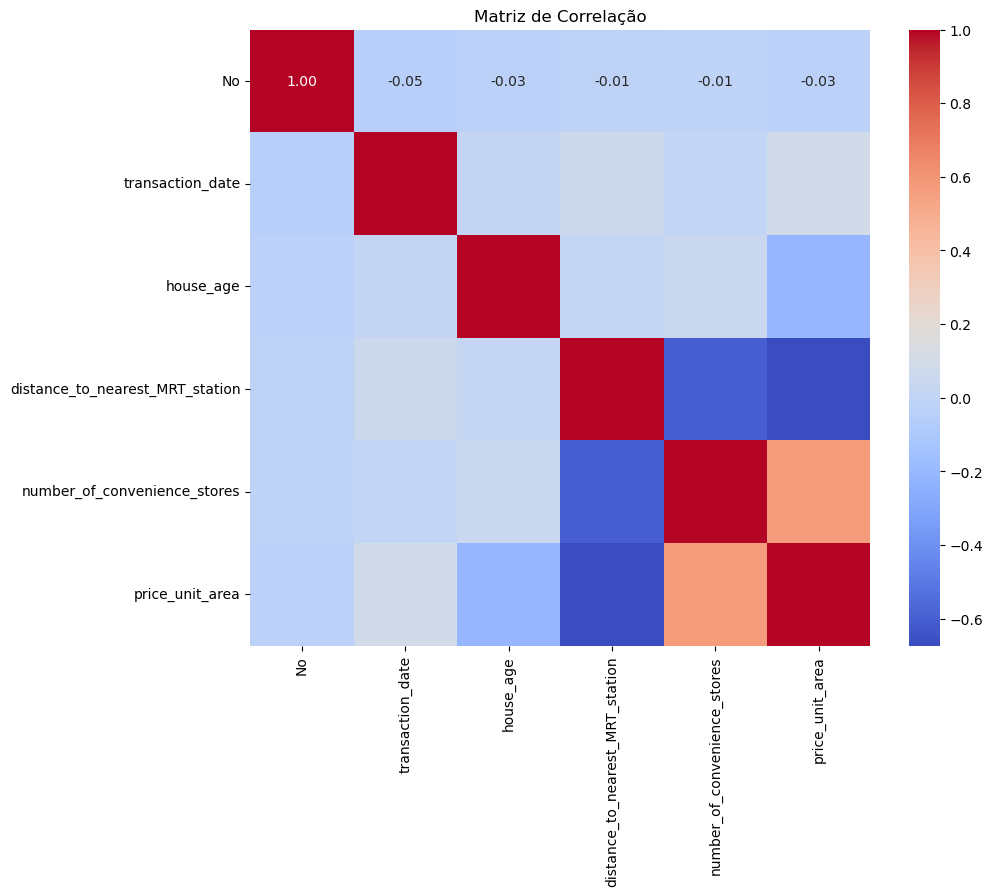

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()

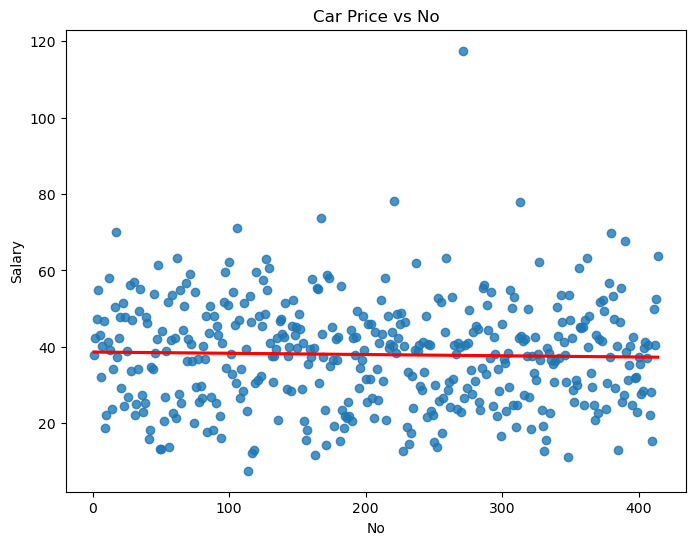

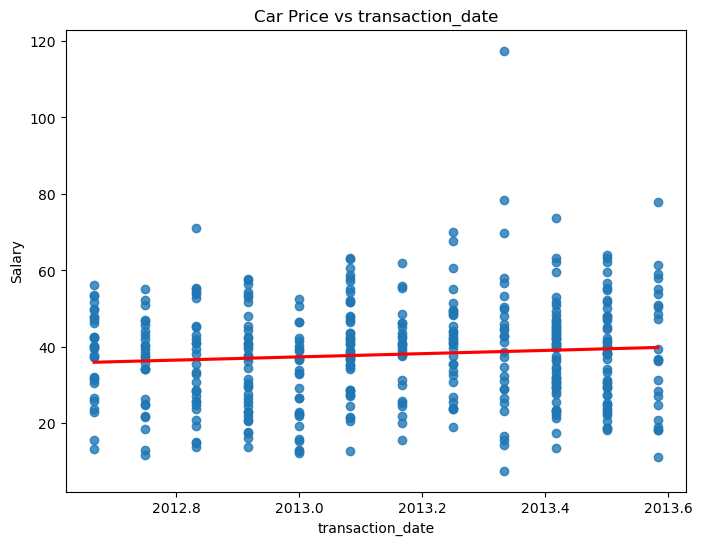

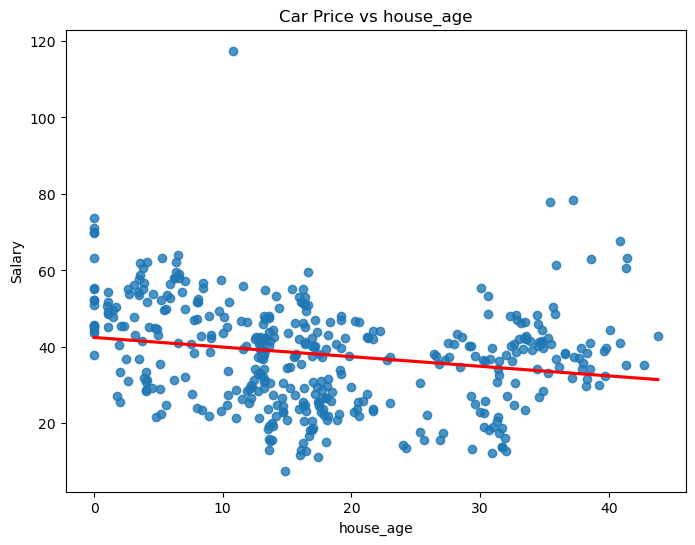

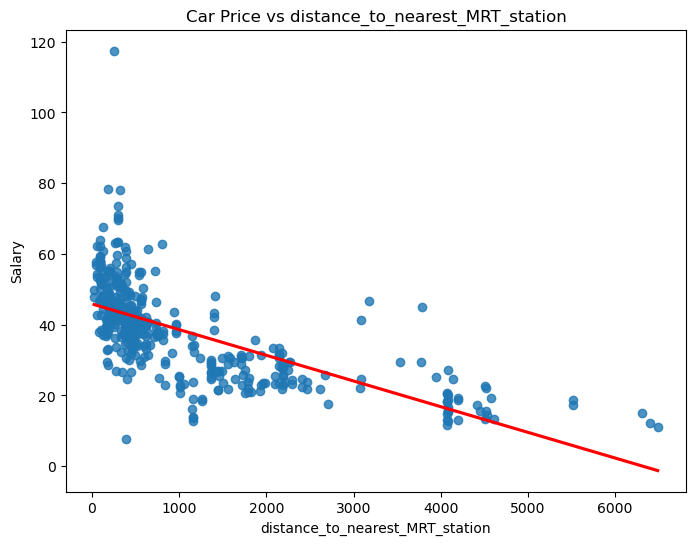

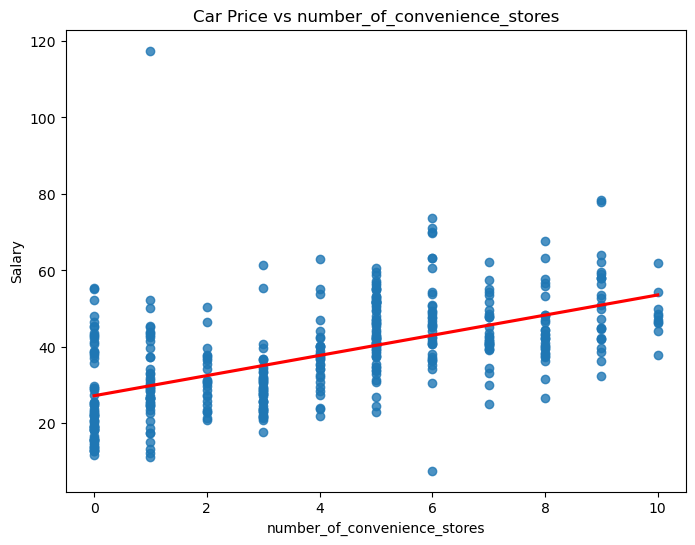

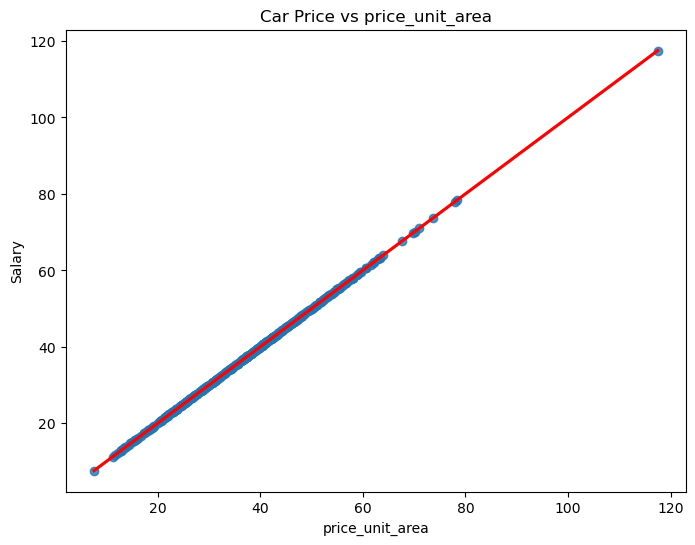

In [53]:
# Gráficos de dispersão para cada variável independente com alta taxa de correlação
features = df.columns  # Substitua pelos nomes reais das colunas

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[feature], y=df['price_unit_area'], ci=None, line_kws={"color": "red"})
    plt.title(f"Car Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Salary")
    plt.show()

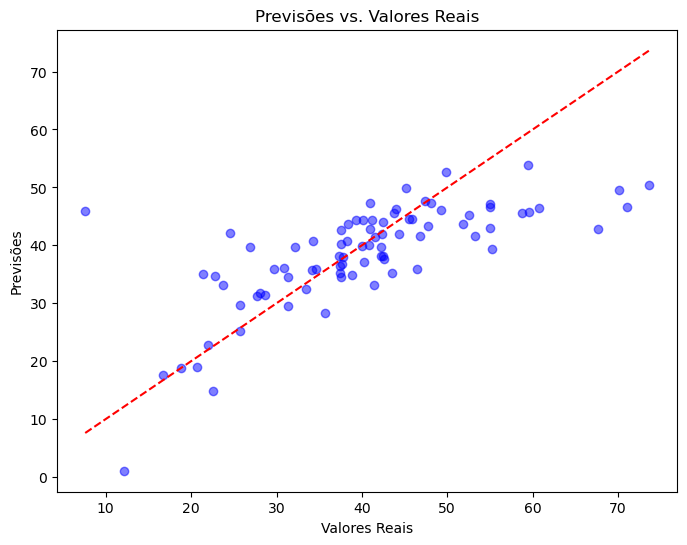

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Previsões vs. Valores Reais")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.show()

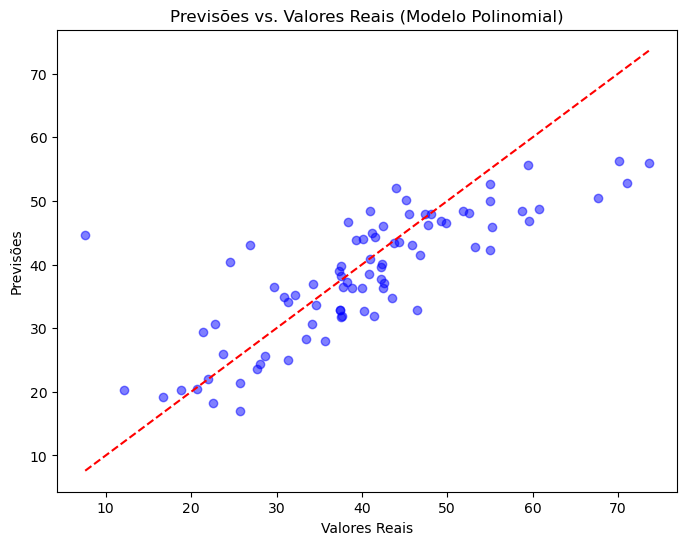

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Criando um modelo de regressão polinomial de grau 2
degree = 2  # Pode ajustar para graus maiores se necessário
polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Ajustando o modelo
polynomial_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_poly = polynomial_model.predict(X_test)

# Comparando com os valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Previsões vs. Valores Reais (Modelo Polinomial)")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.show()


In [56]:

# Calculando o MSE e R^2
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Erro Quadrático Médio (MSE) - Modelo Polinomial:", mse_poly)
print("Coeficiente de Determinação (R^2) - Modelo Polinomial:", r2_poly)

Erro Quadrático Médio (MSE) - Modelo Polinomial: 65.66969728267647
Coeficiente de Determinação (R^2) - Modelo Polinomial: 0.6082765774890144
